# Diabetes Prediction Challenge

Your Goal: Predict the probability that a patient will be diagnosed with diabetes.

## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

from statsmodels.stats.proportion import proportions_ztest

from scipy.stats import chi2_contingency

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



## Import Data

In [80]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## Exploratory Data Analysis

### Data Quality Check

In [81]:
train.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [82]:
train.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


In [83]:
print(train.isna().sum())

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


In [84]:
print(train.duplicated().sum())

0


### Target Variable Analysis

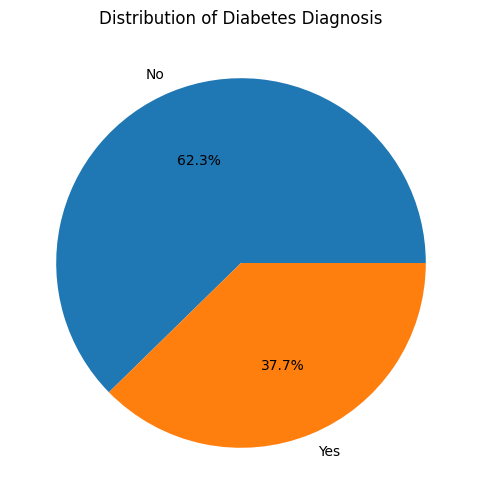

In [85]:
plt.figure(figsize=(8, 6))
plt.pie(train['diagnosed_diabetes'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title("Distribution of Diabetes Diagnosis")
plt.show()

Class imbalance does exist, 37.7% of subjects had cancer while 62.3% did not.

### Feature Analysis

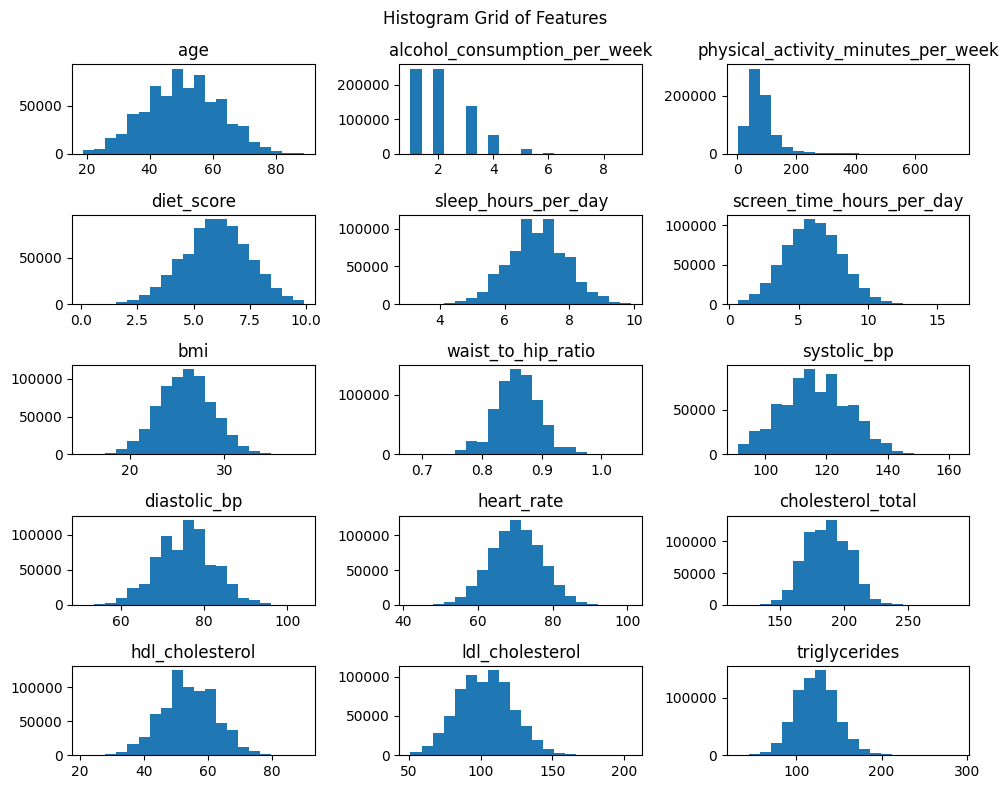

In [86]:
numeric_cols = train.select_dtypes(include=['number']).columns
remove = ['id', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diagnosed_diabetes']
numeric_cols = [c for c in numeric_cols if c not in remove]

fig, axes = plt.subplots(5, 3, figsize = (10, 8))

axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(train[col].dropna(), bins = 20)
    axes[i].set_title(col)

fig.suptitle("Histogram Grid of Features")

plt.tight_layout()
plt.show()

All features seem to be normally distrubted other than physical activity and alcohol consumption

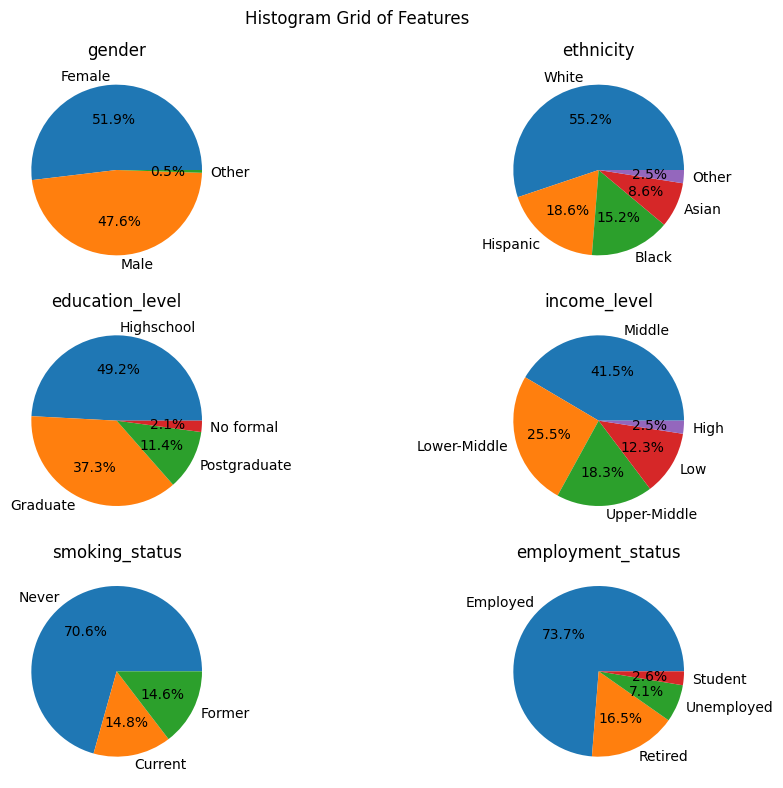

In [87]:
categorical_cols = train.select_dtypes(include='object').columns

fig, axes = plt.subplots(3, 2, figsize = (10, 8))

axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    counts = train[col].value_counts()
    axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%')
    axes[i].set_title(col)

fig.suptitle("Histogram Grid of Features")

plt.tight_layout()
plt.show()

### Relationship Exploration

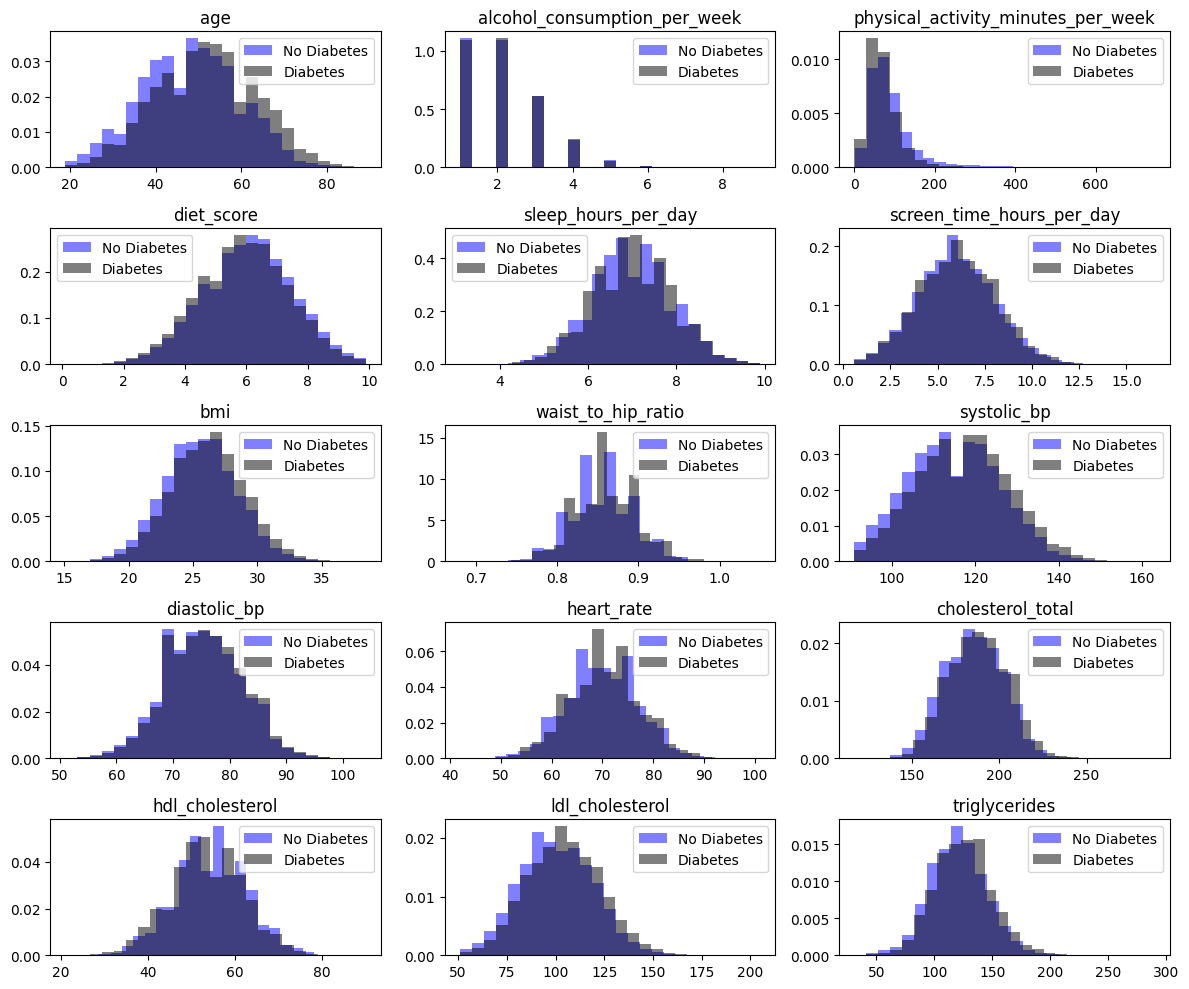

In [88]:
cancer_rows = train[train['diagnosed_diabetes'] == 1]
non_cancer_rows = train[train['diagnosed_diabetes'] != 1]

fig, axes = plt.subplots(5, 3, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(non_cancer_rows[col].dropna(), bins=25, alpha=0.5, color='blue', label='No Diabetes', density=True)
    axes[i].hist(cancer_rows[col].dropna(), bins=25, alpha=0.5, color='black', label='Diabetes', density=True)
    
    axes[i].set_title(col)
    axes[i].legend()  # Add legend to identify histograms

plt.tight_layout()
plt.show()


In [89]:
def t_test(col):
    col_diabetes = cancer_rows[col]
    col_no_diabetes = non_cancer_rows[col]

    t_val, p_val = stats.ttest_ind(col_diabetes, col_no_diabetes)
    print(f"t-test for \"{col}\"")

    print(f"T-value {t_val:.3f}, P-value {p_val}")
    print(f"Mean {col} of Diabetes {col_diabetes.mean():.2f}, Mean {col} of No Diabetes {col_no_diabetes.mean():.2f}")
    if (p_val < 0.05):
        print("SIGNIFICANT")
    else:
        print("NOT SIGNIFICANT")
    print(" ")

for cols in numeric_cols:
    t_test(cols)

t-test for "age"
T-value 136.624, P-value 0.0
Mean age of Diabetes 51.82, Mean age of No Diabetes 47.94
SIGNIFICANT
 
t-test for "alcohol_consumption_per_week"
T-value 2.502, P-value 0.012335663553764163
Mean alcohol_consumption_per_week of Diabetes 2.07, Mean alcohol_consumption_per_week of No Diabetes 2.07
SIGNIFICANT
 
t-test for "physical_activity_minutes_per_week"
T-value -144.148, P-value 0.0
Mean physical_activity_minutes_per_week of Diabetes 73.47, Mean physical_activity_minutes_per_week of No Diabetes 91.41
SIGNIFICANT
 
t-test for "diet_score"
T-value -41.986, P-value 0.0
Mean diet_score of Diabetes 5.91, Mean diet_score of No Diabetes 6.06
SIGNIFICANT
 
t-test for "sleep_hours_per_day"
T-value 2.936, P-value 0.003329975897435391
Mean sleep_hours_per_day of Diabetes 7.00, Mean sleep_hours_per_day of No Diabetes 7.00
SIGNIFICANT
 
t-test for "screen_time_hours_per_day"
T-value 15.241, P-value 1.9411330401569803e-52
Mean screen_time_hours_per_day of Diabetes 6.04, Mean screen_t

In [90]:
def two_sample_proportion_test(col):
    diabetes = train[train['diagnosed_diabetes'] == 1]
    no_diabetes = train[train['diagnosed_diabetes'] != 1]

    diabetes_col_count = diabetes[col].sum()
    diabetes_count = diabetes['diagnosed_diabetes'].sum()

    no_diabetes_col_count = no_diabetes[col].sum()
    no_diabetes_count = len(no_diabetes['diagnosed_diabetes'])

    counts = [diabetes_col_count, no_diabetes_col_count]
    n_obs = [diabetes_count, no_diabetes_count]

    z_val, p_val = proportions_ztest(counts, n_obs, value = None, alternative="two-sided")

    print(f"Two Sample Proportional Test for {col}")
    print(f"z_value : {z_val:.2f}, p_value : {p_val:.2f}")
    if (p_val < 0.05):
        print("SIGNIFICANT")
    else:
        print("NOT SIGNIFICANT")
    print(" ")

for cols in ['family_history_diabetes', 'hypertension_history', 'cardiovascular_history']:
    two_sample_proportion_test(cols)


Two Sample Proportional Test for family_history_diabetes
z_value : 176.59, p_value : 0.00
SIGNIFICANT
 
Two Sample Proportional Test for hypertension_history
z_value : 25.08, p_value : 0.00
SIGNIFICANT
 
Two Sample Proportional Test for cardiovascular_history
z_value : 20.70, p_value : 0.00
SIGNIFICANT
 


In [91]:
def chi_squared_test(cols):
    cont_table = pd.crosstab(train[cols], train['diagnosed_diabetes'])
    print(f"Chi-Square Test for {cols}")
    print("Contingency Table:\n", cont_table)

    # Perform Chi-Square Test
    chi2, p_val, dof, expected = chi2_contingency(cont_table)
    
    print(f"\nChi-Square Statistic: {chi2:.4f}")
    print(f"P-value: {p_val:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:\n", expected)
    print(" ")

    if (p_val < 0.05):
        print("SIGNIFICANT")
    else:
        print("NOT SIGNIFICANT")
    print("------------------")
    print(" ")

print("------------------")
for cols in ['gender', 'ethnicity', 'income_level', 'education_level', 'smoking_status', 'employment_status']:
    chi_squared_test(cols)

------------------
Chi-Square Test for gender
Contingency Table:
 diagnosed_diabetes     0.0     1.0
gender                            
Female              137229  226008
Male                125142  207943
Other                 1322    2356

Chi-Square Statistic: 7.9252
P-value: 0.0190
Degrees of Freedom: 2
Expected Frequencies:
 [[136832.93463    226404.06537   ]
 [125474.54700714 207610.45299286]
 [  1385.51836286   2292.48163714]]
 
SIGNIFICANT
------------------
 
Chi-Square Test for ethnicity
Contingency Table:
 diagnosed_diabetes     0.0     1.0
ethnicity                         
Asian                22335   37785
Black                39982   66319
Hispanic             49873   80111
Other                 6350   11092
White               145153  241000

Chi-Square Statistic: 46.9995
P-value: 0.0000
Degrees of Freedom: 4
Expected Frequencies:
 [[ 22647.46165714  37472.53834286]
 [ 40044.04227571  66256.95772429]
 [ 48965.52987429  81018.47012571]
 [  6570.47615143  10871.52384857]


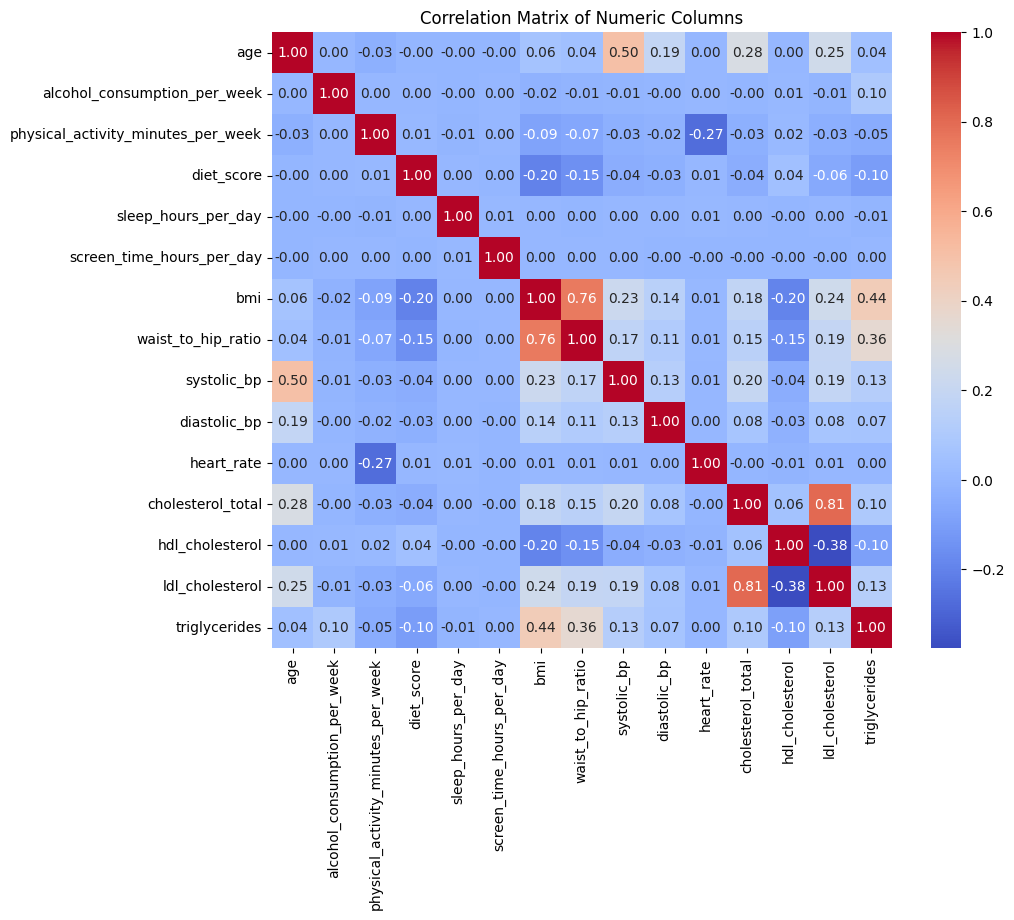

In [92]:
# Compute correlation matrix
corr_matrix = train[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

## Building Model

### Transform Data

In [93]:
X_train_unprocessed = train.drop(columns=['id', 'diagnosed_diabetes'])
y_train = train['diagnosed_diabetes']

X_test_unprocessed = test.drop(columns=['id'])

In [94]:
# Log Transform Data
X_train_unprocessed['alcohol_consumption_per_week'] = np.log(train['alcohol_consumption_per_week'] + 1)
X_train_unprocessed['physical_activity_minutes_per_week'] = np.log(train['physical_activity_minutes_per_week'] + 1)

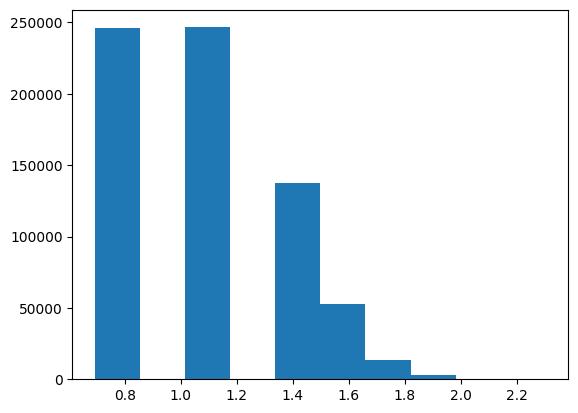

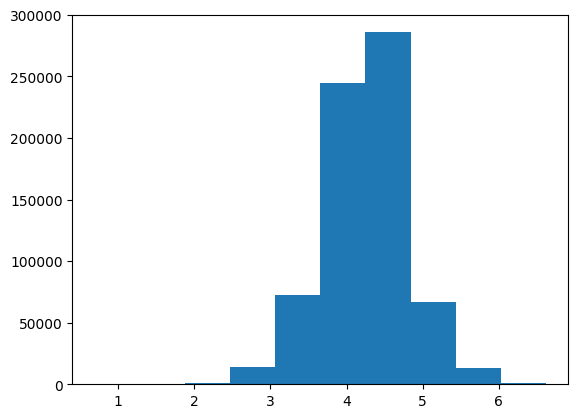

In [95]:
plt.hist(X_train_unprocessed['alcohol_consumption_per_week'])
plt.show()

plt.hist(X_train_unprocessed['physical_activity_minutes_per_week'])
plt.show()

### Preprocessing Pipeline

In [96]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

X_train = preprocessor.fit_transform(X_train_unprocessed)
X_test = preprocessor.transform(X_test_unprocessed)

In [97]:
new_columns = preprocessor.get_feature_names_out()
new_columns

array(['num__age', 'num__alcohol_consumption_per_week',
       'num__physical_activity_minutes_per_week', 'num__diet_score',
       'num__sleep_hours_per_day', 'num__screen_time_hours_per_day',
       'num__bmi', 'num__waist_to_hip_ratio', 'num__systolic_bp',
       'num__diastolic_bp', 'num__heart_rate', 'num__cholesterol_total',
       'num__hdl_cholesterol', 'num__ldl_cholesterol',
       'num__triglycerides', 'cat__gender_Male', 'cat__gender_Other',
       'cat__ethnicity_Black', 'cat__ethnicity_Hispanic',
       'cat__ethnicity_Other', 'cat__ethnicity_White',
       'cat__education_level_Highschool',
       'cat__education_level_No formal',
       'cat__education_level_Postgraduate', 'cat__income_level_Low',
       'cat__income_level_Lower-Middle', 'cat__income_level_Middle',
       'cat__income_level_Upper-Middle', 'cat__smoking_status_Former',
       'cat__smoking_status_Never', 'cat__employment_status_Retired',
       'cat__employment_status_Student',
       'cat__employment_st

### Base Logistic Model

In [98]:
full_model = LogisticRegression(random_state=1)
full_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
# Get model accuracy
score = full_model.score(X_train, y_train)
print(f"Accuracy: {score * 100:.2f}%")

# Predict on training set
y_pred = full_model.predict(X_train)

# Compute metrics
metrics = {
    'Accuracy': [accuracy_score(y_train, y_pred)],
    'Precision': [precision_score(y_train, y_pred, zero_division=0)],
    'Recall': [recall_score(y_train, y_pred, zero_division=0)],
    'F1-score': [f1_score(y_train, y_pred, zero_division=0)]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics, index=['Full Model'])
print(metrics_df)


Accuracy: 64.99%
            Accuracy  Precision    Recall  F1-score
Full Model  0.649914   0.664115  0.886885  0.759502


In [107]:
from sklearn.model_selection import cross_val_score

def cross_validation(model):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=cv)
    print(f"Cross-validation scores: {scores}")
    print(f"Mean CV score: {scores.mean():.4f} (+/- {scores.std():.4f})")

cross_validation(full_model)

Cross-validation scores: [0.65142857 0.65099286 0.64927143 0.64796429 0.64927857]
Mean CV score: 0.6498 (+/- 0.0013)


# Submission

In [ ]:
submission = pd.DataFrame({
    "id" : test['id'],
    "diagnosed_diabetes" : full_model.predict(X_test)
})

submission.to_csv("data/submission.csv", index = False)